# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np


In [2]:
with zipfile.ZipFile('data_all.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [12]:
data = pd.read_csv('data_all.csv')
data_array= np.array(data)

In [4]:
data.e.unique(), len(data.e.unique())
#these are the unique characters

(array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
        32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
        44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
        49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
        22., 56., 48., 52., 16., 17., 54., 21., 50., 45.]),
 62)

In [5]:
data.e.min(),data.e.max()
#we got 62 characters, 26 lower, 26, upper and 10 digits

(0.0, 61.0)

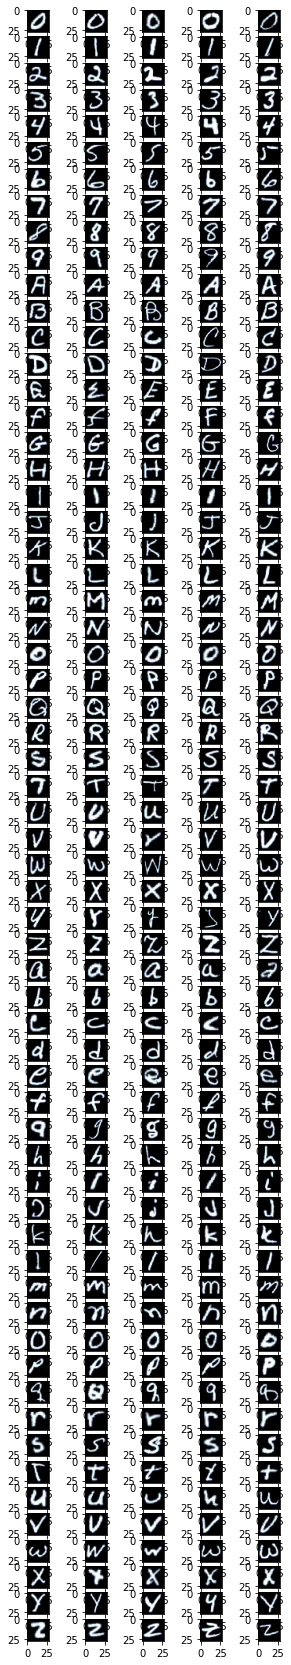

In [6]:
fig, axes = plt.subplots(62,5,figsize=(5,30))
for j in range(62):
    lst = list(data[data['e']==j].index[:5])
    for i,pic in enumerate(lst):
        axes[j,i].imshow(data_array[pic][1:].reshape(28, 28), cmap=plt.cm.bone);

In [13]:
data['char_type']= ['number' if x <= 9
           else 'upper' if 9<x <36
           else 'lower' for x in data['e']]
data['char_type'].unique()

array(['lower', 'number', 'upper'], dtype=object)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

models= [SVC,MultinomialNB,GaussianNB,RandomForestClassifier, DecisionTreeClassifier,LogisticRegression]


In [21]:
def modeling_testing(lista_modelos, data, char):
    X = data[data['char_type']==char].drop(columns = ['char_type','e'])
    y = data[data['char_type']==char]['e']
    
    X_train,x_test,y_train, y_test = train_test_split(X,y, test_size=0.2)
    
    for i in lista_modelos:
        modelo = i()
        modelo.fit(X_train,y_train)
        train_score = modelo.score(X_train,y_train)
        test_score = modelo.score(x_test, y_test)
        print('Modelo :', str(i).split(sep = '.')[-1][:-2])
        print('Train_score :', train_score,'\nTest_Score:' ,test_score,'\n')

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [22]:
modeling_testing(models,data,'upper')
#SVC has the best score with RandomForest a close second

Modelo : SVC
Train_score : 0.970130802360823 
Test_Score: 0.9282182166214707 

Modelo : MultinomialNB
Train_score : 0.6949672994097942 
Test_Score: 0.6930929972882437 

Modelo : GaussianNB
Train_score : 0.5318232572978147 
Test_Score: 0.5421917371191578 

Modelo : RandomForestClassifier
Train_score : 1.0 
Test_Score: 0.908278832349657 

Modelo : DecisionTreeClassifier
Train_score : 1.0 
Test_Score: 0.7272292231615888 

Modelo : LogisticRegression
Train_score : 0.8912505981815282 
Test_Score: 0.8124102727707768 



/Users/saulsoni/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Try to do the same thing with lowercases.

In [23]:
modeling_testing(models,data,'lower')
#The best score here is the SVC and RandomForest second best

Modelo : SVC
Train_score : 0.9465052894165473 
Test_Score: 0.909460458240946 

Modelo : MultinomialNB
Train_score : 0.64309142144408 
Test_Score: 0.639320029563932 

Modelo : GaussianNB
Train_score : 0.4048136000369566 
Test_Score: 0.39560236511456026 

Modelo : RandomForestClassifier
Train_score : 1.0 
Test_Score: 0.8813747228381374 

Modelo : DecisionTreeClassifier
Train_score : 1.0 
Test_Score: 0.7193274205469328 

Modelo : LogisticRegression
Train_score : 0.8463528433501178 
Test_Score: 0.7941611234294161 



/Users/saulsoni/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Try to do the same thing with numbers.

In [24]:
modeling_testing(models,data,'number')
#The SVC is the best test score and RandomForest close second

Modelo : SVC
Train_score : 0.9916476021927743 
Test_Score: 0.9837707182320442 

Modelo : MultinomialNB
Train_score : 0.8158587646220917 
Test_Score: 0.8181975138121547 

Modelo : GaussianNB
Train_score : 0.6389260586178616 
Test_Score: 0.6443370165745856 

Modelo : RandomForestClassifier
Train_score : 1.0 
Test_Score: 0.9755697513812155 

Modelo : DecisionTreeClassifier
Train_score : 1.0 
Test_Score: 0.8939053867403315 



/Users/saulsoni/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo : LogisticRegression
Train_score : 0.9462166011999827 
Test_Score: 0.9366367403314917 

